# Keras Sequential Model

Today we're going to look at Keras, which is a high-level language for building neural networks in TensorFlow (or other languages -- but we'll focus on Tensorflow).
This notebook will focus on the sequential model, which is just a linear stack of layers.

Usually we don't need to use all of keras so we don't typically see `import keras` (that would really slow your computer down!).
Instead, just import what we need:

In [16]:
from keras.models import Sequential # sequential model
from keras.layers import Dense, Activation # layers
import numpy as np

If your notebook uses a backend other than `TensorFlow` then check out [this link](https://keras.io/backend/) to set it to `TensorFlow`.
If you use a different back end, there are subtle differences that may lead to you getting different results or bugs and that's no fun when starting out!

## Defining a Model

Here we'll look at a `Sequential` model which is just an ordered stack of layers.

In [17]:
help(Sequential)

Help on class Sequential in module keras.models:

class Sequential(keras.engine.training.Model)
 |  Linear stack of layers.
 |  
 |  # Arguments
 |      layers: list of layers to add to the model.
 |  
 |  # Note
 |      The first layer passed to a Sequential model
 |      should have a defined input shape. What that
 |      means is that it should have received an `input_shape`
 |      or `batch_input_shape` argument,
 |      or for some type of layers (recurrent, Dense...)
 |      an `input_dim` argument.
 |  
 |  # Example
 |  
 |      ```python
 |          model = Sequential()
 |          # first layer must have a defined input shape
 |          model.add(Dense(32, input_dim=500))
 |          # afterwards, Keras does automatic shape inference
 |          model.add(Dense(32))
 |  
 |          # also possible (equivalent to the above):
 |          model = Sequential()
 |          model.add(Dense(32, input_shape=(500,)))
 |          model.add(Dense(32))
 |  
 |          # also possibl

One way to specify a model is with a list (using `[]`) of layers.
**NB**:

> The first layer passed to a Sequential model
 |      should have a defined input shape. What that
 |      means is that it should have received an `input_shape`
 |      or `batch_input_shape` argument,
 |      or for some type of layers (recurrent, Dense...)
 |      an `input_dim` argument.
 
 Like `TensorFlow`, `keras` separates out the model definition and model running.
 So defining the model takes essentially no time.

In [18]:
layers = [
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
]
model = Sequential(layers)

Let's visualize this simple model that we've created!
**NB**: for some reason the `graphviz` package is a pain to install correctly so you may not be able to run this.
`Keras`'s own plotting functions just call it through a backend and don't check that it's installed. 
See [here](http://www.graphviz.org/) for installing graphviz

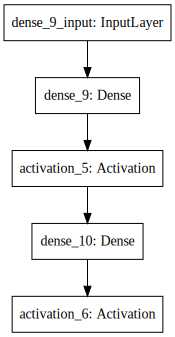

In [19]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

What have we done?
We have an input layer (whose shape we have specified) which gets passed to a "Dense-32" layer (more in a second). 
Then there is a "relu" activation layer followed by a "Dense-10" later and another "softmax" activation layer.
Before we talk about these layers let's see an alternative way to write the same model

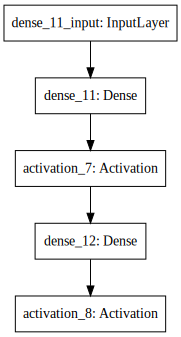

In [20]:
model = Sequential()
model.add(Dense(32, input_dim=784))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
SVG(model_to_dot(model).create(prog='dot', format='svg'))

So we can see that other than the names (which are generated from scratch -- don't read much into them) we have the same thing.
Thus we can create models by:
- creating a list of layers and passing this as an argument to `Sequential()`
- doing an empty run of `Sequential()` and then using `model.add()`
- some combination of both. You can get fancy...

## About Layers

OK cool -- we can define a model.
But what are those layers?

In [21]:
help(Dense)

Help on class Dense in module keras.layers.core:

class Dense(keras.engine.topology.Layer)
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: if the input to the layer has a rank greater than 2, then
 |  it is flattened prior to the initial dot product with `kernel`.
 |  
 |  # Example
 |  
 |  ```python
 |      # as first layer in a sequential model:
 |      model = Sequential()
 |      model.add(Dense(32, input_shape=(16,)))
 |      # now the model will take as input arrays of shape (*, 16)
 |      # and output arrays of shape (*, 32)
 |  
 |      # after the first layer, you don't need to specify
 |      # the size of the in

In other words, a dense layer creates (`units`) nodes in a layer, and where _every_ note from the previous layer (if this is the first layer you specify input shape, otherwise you don't specify input shape) is connected to every node.
A big tangled web!
Remember what we learned though: we need an activation layer for our neurons!

In [22]:
help(Activation)

Help on class Activation in module keras.layers.core:

class Activation(keras.engine.topology.Layer)
 |  Applies an activation function to an output.
 |  
 |  # Arguments
 |      activation: name of activation function to use
 |          (see: [activations](../activations.md)),
 |          or alternatively, a Theano or TensorFlow operation.
 |  
 |  # Input shape
 |      Arbitrary. Use the keyword argument `input_shape`
 |      (tuple of integers, does not include the samples axis)
 |      when using this layer as the first layer in a model.
 |  
 |  # Output shape
 |      Same shape as input.
 |  
 |  Method resolution order:
 |      Activation
 |      keras.engine.topology.Layer
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, activation, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  call(self, inputs)
 |      This is where the layer's logic lives.
 |      
 |      # Arguments
 |          inputs: Input tensor, 

`Keras` also thinks that you should read about the `input_dim` [here](https://keras.io/getting-started/sequential-model-guide/): but we won't go into it much more.

## Compiling

Thus far, we have tools and degrees of freedom to do a couple of cool things:
1. Build arbitrarily deep stacks of layers, where each stack can be arbitrarily big (though just because we can doesn't mean we should.!)
2. Change our activation functions

There's a lot more we can do later, but let's see what we do to actually run a model!
When we configure the model training process, we get some more degrees of freedom:
1. An optimizer. This could be the string identifier of an existing optimizer (such as rmsprop or adagrad), or an instance of the Optimizer class.
2. A loss function. This is the objective that the model will try to minimize. It can be the string identifier of an existing loss function (such as categorical_crossentropy or mse), or it can be an objective function.
3. A list of metrics. For any classification problem you will want to set this to metrics=['accuracy']. A metric could be the string identifier of an existing metric or a custom metric function.

For example:

In [23]:
# For a multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# For a binary classification problem
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# For a mean squared error regression problem
model.compile(optimizer='rmsprop',
              loss='mse')

# For custom metrics
import keras.backend as K

def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy', mean_pred])

The last command that we care about is `fit`.
To see how that works, let's start from scratch.
Let's start by generating dummy data with 1000 rows and 100 columns (features).
Since we're making this data up, we don't expect our model to get very good.

In [24]:
data = np.random.random((1000, 100))
labels = np.random.randint(2, size=(1000, 1))

Define a simple model to fit the data.
Note two important things. 
First, the `activation` function is now specified as an argument to `Dense()` rather than as a separate layer.
That's a bit confusing, but allowed.
Second, the `input_dim` is specified to match the number of columns of our input data, while the last layer has just 1 node with a sigmoid activation: `Dense(1, activation='sigmoid')` because it has to match the dimension of the `labels`.

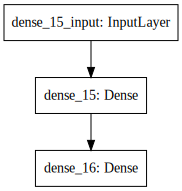

In [28]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=100))
model.add(Dense(1, activation='sigmoid'))
SVG(model_to_dot(model).create(prog='dot', format='svg'))

Compile the model.
We'll use the `rmsprop` optimizer, and as a loss function `binary_crossentropy` works well (I am told).
We'll set `metrics=['accuracy']` so that the function will tell us how accurate our model is.

In [29]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Now train the model.
The `epochs` parameters specifies how many times you go through the data -- more on this later but if it's too small you don't train enough and if it's too big you overfit.
Since this is a toy example we'll set it small.

In [30]:
model.fit(data, labels, epochs=10, batch_size=32)

Epoch 1/10
1000/1000 [==============================] - 0s - loss: 0.7209 - acc: 0.4730     
Epoch 2/10
1000/1000 [==============================] - 0s - loss: 0.7032 - acc: 0.5090     
Epoch 3/10
1000/1000 [==============================] - 0s - loss: 0.6920 - acc: 0.5340     
Epoch 4/10
1000/1000 [==============================] - 0s - loss: 0.6849 - acc: 0.5440     
Epoch 5/10
1000/1000 [==============================] - 0s - loss: 0.6783 - acc: 0.5800     
Epoch 6/10
1000/1000 [==============================] - 0s - loss: 0.6752 - acc: 0.5730     
Epoch 7/10
1000/1000 [==============================] - 0s - loss: 0.6714 - acc: 0.5730     
Epoch 8/10
1000/1000 [==============================] - 0s - loss: 0.6679 - acc: 0.5820     
Epoch 9/10
1000/1000 [==============================] - 0s - loss: 0.6639 - acc: 0.5990     
Epoch 10/10
1000/1000 [==============================] - 0s - loss: 0.6574 - acc: 0.6100     


Cool! We have successfully fit our data to noise! Lok how the loss function has decreased (a bit) and the accuracy (our metric!) has increased.
Let's see another toy example, this time with 10 classes

In [31]:
data = np.random.random((1000, 100))
labels = np.random.randint(10, size=(1000, 1))

We need to change the format of the `labels` a bit -- instead of being a vector with a number 1-10 in each row, we want it to be matrix with 10 columns of zeros, except in the corresponding column.
Then when our neurons fire on the correct node, they get a 1 back and when they fire on the incorrect node they get a 0.
Luckily `keras` has implemented this for us in one line.

In [33]:
from keras.utils import to_categorical
one_hot_labels = to_categorical(labels, num_classes=10)

In [35]:
labels[0:10]

array([[1],
       [6],
       [5],
       [6],
       [6],
       [6],
       [2],
       [6],
       [5],
       [3]])

In [34]:
one_hot_labels[0:10,:]

array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])

Now we'll define, compile, and run our model all at once.
Note that we have the same optimizer as before but a different loss function.

In [36]:
model = Sequential()
model.add(Dense(37, activation='relu', input_dim=100))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(data, one_hot_labels, epochs=50, batch_size=32)

Epoch 1/50
1000/1000 [==============================] - 0s - loss: 2.3577 - acc: 0.0820     
Epoch 2/50
1000/1000 [==============================] - 0s - loss: 2.3204 - acc: 0.1060     
Epoch 3/50
1000/1000 [==============================] - 0s - loss: 2.3065 - acc: 0.1230     
Epoch 4/50
1000/1000 [==============================] - 0s - loss: 2.2937 - acc: 0.1250     
Epoch 5/50
1000/1000 [==============================] - 0s - loss: 2.2871 - acc: 0.1390     
Epoch 6/50
1000/1000 [==============================] - 0s - loss: 2.2791 - acc: 0.1310     
Epoch 7/50
1000/1000 [==============================] - 0s - loss: 2.2712 - acc: 0.1510     
Epoch 8/50
1000/1000 [==============================] - 0s - loss: 2.2651 - acc: 0.1490     
Epoch 9/50
1000/1000 [==============================] - 0s - loss: 2.2594 - acc: 0.1600     
Epoch 10/50
1000/1000 [==============================] - 0s - loss: 2.2484 - acc: 0.1660     - ETA: 0s - loss: 2.2460 - acc: 0.176
Epoch 11/50
1000/1000 [=========

We have now fit our model to get our accuracy up substantially -- but remember we are classifying noise!
Let's go to another notebook to see some examples on real data!
I recommend [this cheat sheet](https://www.datacamp.com/community/blog/keras-cheat-sheet#gs.ztgK3dE) for keras syntax!

In [42]:
model.weights[0]

<tf.Variable 'dense_17/kernel:0' shape=(100, 37) dtype=float32_ref>